(16008001, 2)


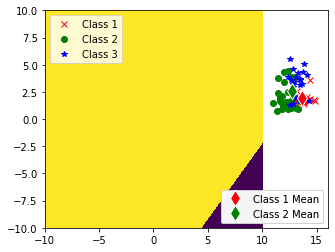

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def plotDecBoundaries(training, label_train, sample_mean):

    #Plot the decision boundaries and data points for minimum distance to
    #class mean classifier
    #
    # training: traning data
    # label_train: class lables correspond to training data
    # sample_mean: mean vector for each class
    #
    # Total number of classes
    nclass =  max(np.unique(label_train))

    # Set the feature range for ploting
    max_x = np.ceil(max(training[:, 0])) + 1
    min_x = np.floor(min(training[:, 0])) - 1
    max_y = np.ceil(max(training[:, 1])) + 1
    min_y = np.floor(min(training[:, 1])) - 1

    xrange = (-10, 10)
    yrange = (-10, 10)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.005

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.
    print(xy.shape)
    # distance measure evaluations for each (x,y) pair.
    dist_mat = cdist(xy, sample_mean)
    pred_label = np.argmin(dist_mat,axis=1)

    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order='F')
    plt.figure(1)
    #show the image, give each coordinate a color according to its class label
    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')

    # plot the class training data.
    plt.plot(training[label_train == 1, 0],training[label_train == 1, 1], 'rx')
    plt.plot(training[label_train == 2, 0],training[label_train == 2, 1], 'go')
    if nclass == 3:
        plt.plot(training[label_train == 3, 0],training[label_train == 3, 1], 'b*')

    # include legend for training data
    if nclass == 3:
        l = plt.legend(('Class 1', 'Class 2', 'Class 3'), loc=2)
    else:
        l = plt.legend(('Class 1', 'Class 2'), loc=2)
    plt.gca().add_artist(l)

    # plot the class mean vector.
    m1, = plt.plot(sample_mean[0,0], sample_mean[0,1], 'rd', markersize=12, markerfacecolor='r', markeredgecolor='w')
    m2, = plt.plot(sample_mean[1,0], sample_mean[1,1], 'gd', markersize=12, markerfacecolor='g', markeredgecolor='w')
#     if nclass == 3:
#         m3, = plt.plot(sample_mean[1,0], sample_mean[1,1], 'bd', markersize=12, markerfacecolor='b', markeredgecolor='w')

    # include legend for class mean vector
#     if nclass == 3:
#         l1 = plt.legend([m1,m2],['Class 1 Mean', 'Class 2 Mean'], loc=3)
#     else:
    l1 = plt.legend([m1,m2], ['Class 1 Mean', 'Class 2 Mean'], loc=4)

    plt.gca().add_artist(l1)
    plt.show()
    
def main():
    Class1Feature1=[] 
    Class1Feature2=[] 
    Class2Feature1=[] 
    Class2Feature2=[] 
    Class3Feature1=[] 
    Class3Feature2=[] 
    ClassLabel=[]  
    ClassLabel1=[] 
    miss,miss1=0,0 
    #Reading csv files 
    data = np.genfromtxt('wine_train.csv', dtype=float, delimiter=',') 
    data1=np.genfromtxt('wine_test.csv',dtype=float, delimiter=',') 
    #Extracting Class Labels 
    for i in range(0,89): 
        ClassLabel.append(data[i][13]) 
        ClassLabel1.append(data1[i][13]) 
    #Extracting Features of 3 Classes 
    for i in range(0,30): 
        Class1Feature1.append(data[i][0]) 
        Class1Feature2.append(data[i][1]) 
 
    for y in range(30,66): 
        Class2Feature1.append(data[y][0]) 
        Class2Feature2.append(data[y][1]) 
         
    for j in range(66,89): 
        Class3Feature1.append(data[j][0]) 
        Class3Feature2.append(data[j][1]) 
    #Converting Lists to Arrays     
    Class1Feature1=np.asarray(Class1Feature1) 
    Class1Feature2=np.asarray(Class1Feature2) 
    Class2Feature1=np.asarray(Class2Feature1) 
    Class2Feature2=np.asarray(Class2Feature2) 
    Class3Feature1=np.asarray(Class3Feature1) 
    Class3Feature2=np.asarray(Class3Feature2) 
    ClassLabel=np.asarray(ClassLabel) 
    ClassLabel1=np.asarray(ClassLabel1) 
 
 
    #Calculating sample mean 
    Meanc1f1=np.mean(Class1Feature1) 
    Meanc1f2=np.mean(Class1Feature2) 
    Meanc2f1=np.mean(Class2Feature1) 
    Meanc2f2=np.mean(Class2Feature2) 
    Meanc3f1=np.mean(Class3Feature1) 
    Meanc3f2=np.mean(Class3Feature2)
    
 
    SampleMean=np.array([[Meanc1f1,Meanc1f2],[(Meanc2f1+Meanc3f1)/2,(Meanc2f2+Meanc3f2)/2]])
    SampleMean1=np.array([[Meanc2f1,Meanc2f2],[(Meanc1f1+Meanc3f1)/2,(Meanc1f2+Meanc3f2)/2]])
    SampleMean2=np.array([[Meanc3f1,Meanc3f2],[(Meanc1f1+Meanc2f1)/2,(Meanc1f2+Meanc2f2)/2]])
    
    
    plotDecBoundaries(data,ClassLabel,SampleMean)
#     plotDecBoundaries(data,ClassLabel,SampleMean1)
#     plotDecBoundaries(data,ClassLabel,SampleMean2)
    

if __name__=='__main__':
    main()
    

